In [7]:
# imports
import sys
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# import custom libraries and scripts
# sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(".")
sys.path.append("..")

from defaults import *
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

In [9]:
# read processed data set
tweets_df = pd.read_json('../data/clean_data.json')

# read same but compressed data set for profiling
tweets_df_csv = pd.read_csv('../data/clean_data.csv') 

### EDA

In [10]:
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,status_count,retweet_count,screen_name,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-08-07 22:31:20,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,4,8097,2,i_ameztoy,i_ameztoy,20497,2621,unknown,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",unknown
1,2022-08-07 22:31:16,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,691,5831,201,ZIisq,ZIisq,65,272,unknown,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",unknown
2,2022-08-07 22:31:07,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,1627,0,Fin21Free,Fin21Free,85,392,unknown,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,2022-08-07 22:31:06,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,1627,0,Fin21Free,Fin21Free,85,392,unknown,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,2022-08-07 22:31:04,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,1521,18958,381,VizziniDolores,VizziniDolores,910,2608,unknown,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


In [11]:
cleaner = Clean_Tweets(tweets_df.copy())

Automation in Action...!!!


### Making explorations

In [12]:
# shape of dataframe
tweets_df.shape

(7440, 17)

In [13]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7440 entries, 0 to 21997
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          7440 non-null   datetime64[ns]
 1   source              7440 non-null   object        
 2   original_text       7440 non-null   object        
 3   polarity            7440 non-null   float64       
 4   subjectivity        7440 non-null   float64       
 5   lang                7440 non-null   object        
 6   favorite_count      7440 non-null   int64         
 7   status_count        7440 non-null   int64         
 8   retweet_count       7440 non-null   int64         
 9   screen_name         7440 non-null   object        
 10  original_author     7440 non-null   object        
 11  followers_count     7440 non-null   int64         
 12  friends_count       7440 non-null   int64         
 13  possibly_sensitive  7440 non-null   object     

In [14]:
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
status_count          0
retweet_count         0
screen_name           0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

No missing values

In [15]:
# stats about numerical columns
tweets_df.describe()

,polarity,subjectivity,favorite_count,status_count,retweet_count,followers_count,friends_count
count,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7.440000e+03,7440.000000
mean,0.056783,0.295638,203.351210,4.900565e+04,38.713172,4.107761e+04,1715.558871
std,0.230156,0.287805,1655.690148,1.432954e+05,326.757025,4.910108e+05,5305.897528
min,-1.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,1.549250e+03,0.000000,7.275000e+01,106.000000
50%,0.000000,0.250000,0.000000,7.904000e+03,0.000000,3.670000e+02,440.000000
75%,0.136364,0.500000,4.000000,3.510900e+04,2.000000,1.833000e+03,1505.000000
max,1.000000,1.000000,65170.000000,4.108317e+06,17409.000000,1.449852e+07,208360.000000


#### Univariate

In [16]:
tweets_df.original_author

0             i_ameztoy
1                 ZIisq
2             Fin21Free
3             Fin21Free
4        VizziniDolores
              ...      
21974     PelosiLibArmy
21987    SonnyMullins13
21989      TECO_Toronto
21991       samserjio93
21997      ZeitounRimal
Name: original_author, Length: 7440, dtype: object

In [17]:
tweets_df.original_author.value_counts()

TrumpThuan         116
AarianNewsX         57
CGMeifangZhang      43
SoizaDavid          42
doos94619918        36
                  ... 
AoxiPRNew            1
Eloy_Sauvan          1
carnivorecabbie      1
FarmSailing          1
ZeitounRimal         1
Name: original_author, Length: 4624, dtype: int64

<AxesSubplot:title={'center':'Top 10 Tweeters'}, xlabel='Twitter', ylabel='Number of tweets'>

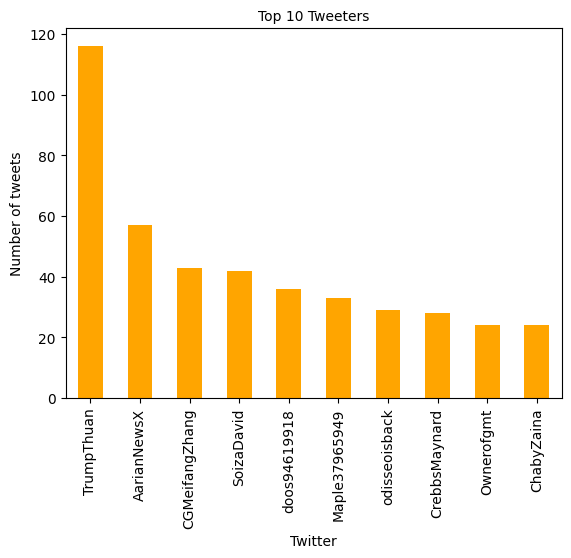

In [18]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitter', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 10 Tweeters', fontsize=10)
tweets_df.original_author.value_counts()[:10].plot(ax=ax, kind='bar', color='orange')

#### locations

In [19]:
tweets_df.place.value_counts()

unknown                           2805
Việt Nam                           116
India                              107
United States                       72
Turn on 🔔                           57
                                  ... 
New York, New York                   1
Fontaines-Saint-Martin, France       1
🇺🇲🇺🇲🇺🇲                               1
Lisbon                               1
🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈                     1
Name: place, Length: 1809, dtype: int64

Most locations are unknown

<AxesSubplot:title={'center':'Top 4 Locations'}, xlabel='Twitters', ylabel='Number of locations'>

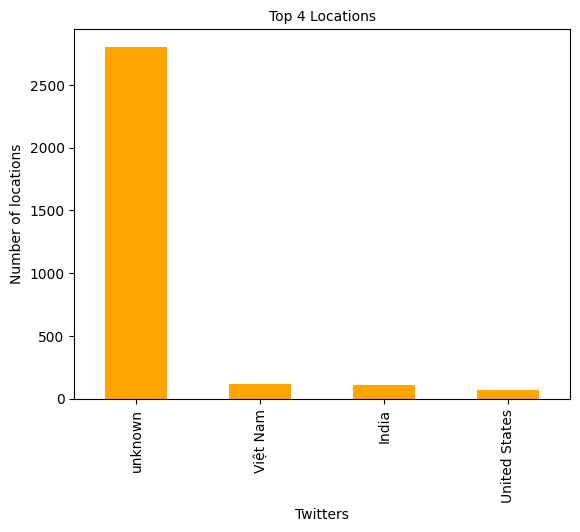

In [20]:
# top 4 locations of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of locations' , fontsize=10)
ax.set_title('Top 4 Locations', fontsize=10)
tweets_df.place.value_counts()[:4].plot(ax=ax, kind='bar', color='orange')

#### source

In [21]:
tweets_df["source"].value_counts()[:5]

<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 2717
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    2360
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      1531
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        191
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      127
Name: source, dtype: int64

The top five sources of tweets

<AxesSubplot:title={'center':'Top 5 sources'}, xlabel='Twitters', ylabel='Number of sources'>

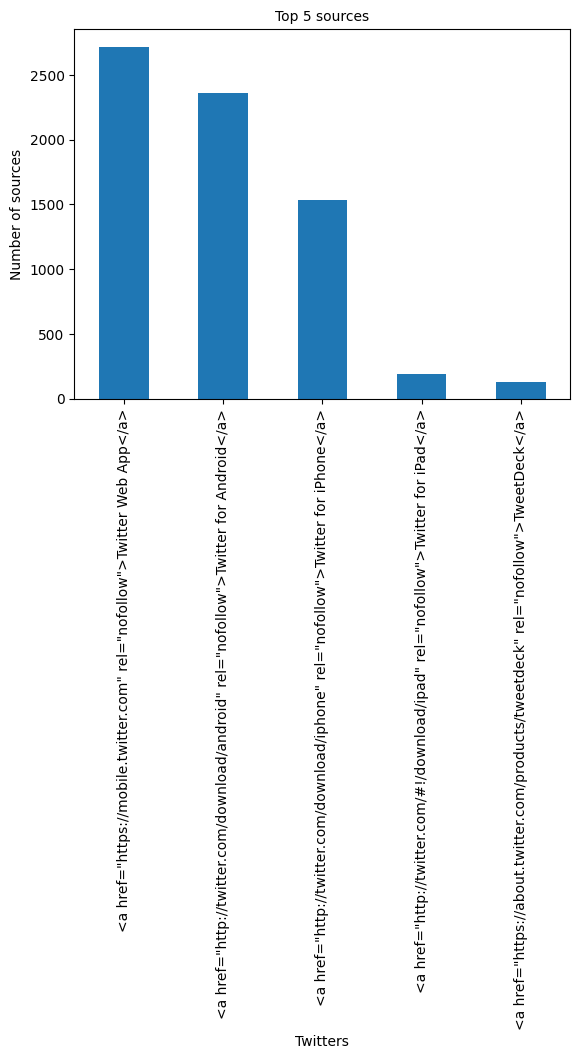

In [22]:
# top 5 sources of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitters', fontsize=10)
ax.set_ylabel('Number of sources' , fontsize=10)
ax.set_title('Top 5 sources', fontsize=10)
tweets_df.source.value_counts()[:5].plot(ax=ax, kind='bar')

#### Possibly sensitive

In [23]:
tweets_df["possibly_sensitive"].value_counts()

0.0        3866
unknown    3463
1.0         111
Name: possibly_sensitive, dtype: int64

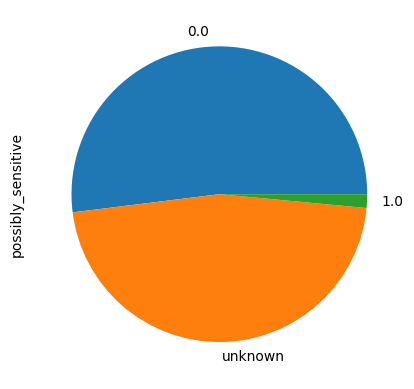

In [24]:
tweets_df["possibly_sensitive"].value_counts().plot(kind="pie");

#### Polarity and subjectivity

In [25]:
tweets_df["polarity"].value_counts()

 0.000000    2894
-0.100000     269
 0.500000     225
-0.050000     188
 0.200000     178
             ... 
 0.151667       1
-0.190000       1
-0.140136       1
 0.013624       1
 0.207143       1
Name: polarity, Length: 760, dtype: int64

##### Sentiments

<AxesSubplot:title={'center':'Sentiment analysis based on polarity'}, xlabel='Values', ylabel='Sentiments'>

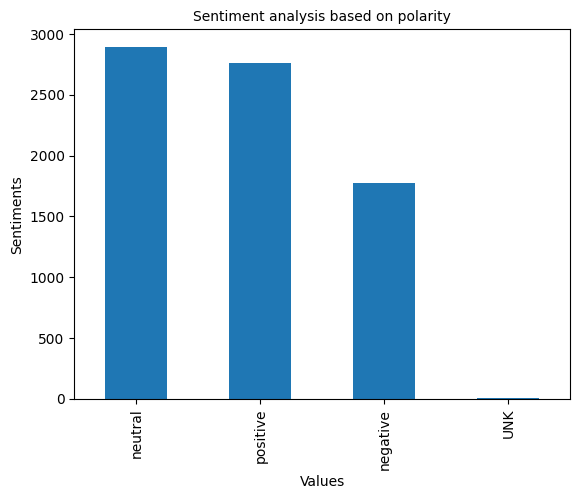

In [26]:
pols = cleaner.text_category(series= tweets_df.polarity)
pols = pd.Series(pols)

# top 5 sources of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Values', fontsize=10)
ax.set_ylabel('Sentiments' , fontsize=10)
ax.set_title('Sentiment analysis based on polarity', fontsize=10)
pols.value_counts().plot(ax=ax, kind='bar')

In [27]:
tweets_df.subjectivity.value_counts()

0.000000    2314
0.500000     435
0.100000     292
1.000000     255
0.400000     231
            ... 
0.301667       1
0.500168       1
0.417857       1
0.343750       1
0.421429       1
Name: subjectivity, Length: 710, dtype: int64

<AxesSubplot:title={'center':'Subjectivity values'}, xlabel='Values', ylabel='Subjectivity'>

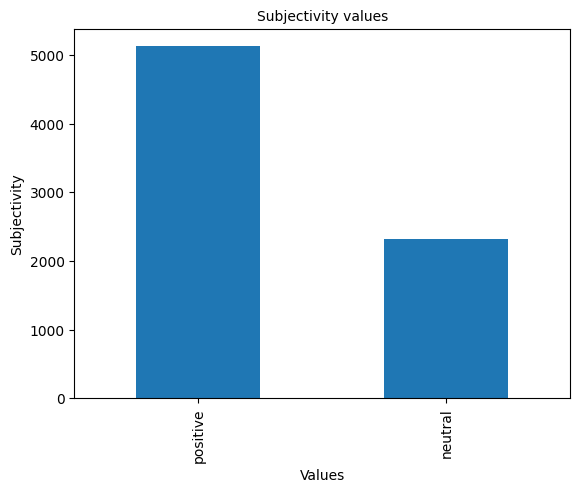

In [28]:
subs = cleaner.text_category(series= tweets_df.subjectivity)
subs = pd.Series(subs)

# top 5 sources of users
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Values', fontsize=10)
ax.set_ylabel('Subjectivity' , fontsize=10)
ax.set_title('Subjectivity values', fontsize=10)
subs.value_counts().plot(ax=ax, kind='bar')

### Hashtags

In [29]:
tweets_df.hashtags

0                [{'text': 'City', 'indices': [132, 137]}]
1        [{'text': 'China', 'indices': [18, 24]}, {'tex...
2           [{'text': 'XiJinping', 'indices': [127, 137]}]
3              [{'text': 'XiJinping', 'indices': [9, 19]}]
4                                                       []
                               ...                        
21974    [{'text': 'China', 'indices': [29, 35]}, {'tex...
21987    [{'text': 'exactly', 'indices': [29, 37]}, {'t...
21989    [{'text': 'Taiwan', 'indices': [168, 175]}, {'...
21991    [{'text': 'China', 'indices': [17, 23]}, {'tex...
21997            [{'text': 'Pelosi', 'indices': [16, 23]}]
Name: hashtags, Length: 7440, dtype: object

In [30]:
tweets_df.hashtags.value_counts()

[]                                                                                                                                                                                                                                                                                          527
[{'text': 'Taiwan', 'indices': [0, 7]}]                                                                                                                                                                                                                                                      62
[{'text': 'ThankYou', 'indices': [0, 9]}, {'text': 'JoeBiden', 'indices': [20, 29]}, {'text': 'Nides', 'indices': [42, 48]}, {'text': 'Pelosi', 'indices': [63, 70]}, {'text': 'IsraelHasTheRightToDefendItself', 'indices': [72, 104]}, {'text': 'IAmAGoodJew', 'indices': [107, 119]}]     20
[{'text': 'Taiwan', 'indices': [36, 43]}]                                                                                               

As we can see there are null hashtags

#### removing null hashtags

In [31]:
# take the rows from that have values in the hashtag columns
hashtags_list_df = tweets_df.loc[tweets_df["hashtags"] != " "]
hashtags_list_df = hashtags_list_df['hashtags']
hashtags_list_df

0                [{'text': 'City', 'indices': [132, 137]}]
1        [{'text': 'China', 'indices': [18, 24]}, {'tex...
2           [{'text': 'XiJinping', 'indices': [127, 137]}]
3              [{'text': 'XiJinping', 'indices': [9, 19]}]
4                                                       []
                               ...                        
21974    [{'text': 'China', 'indices': [29, 35]}, {'tex...
21987    [{'text': 'exactly', 'indices': [29, 37]}, {'t...
21989    [{'text': 'Taiwan', 'indices': [168, 175]}, {'...
21991    [{'text': 'China', 'indices': [17, 23]}, {'tex...
21997            [{'text': 'Pelosi', 'indices': [16, 23]}]
Name: hashtags, Length: 7440, dtype: object

#### flatten the hashtags

In [32]:
#create dataframe where each hashtag gets its own row
flattened_hashtags = []
for hashtags_list in hashtags_list_df:
    for hash_list in hashtags_list:
        # print(list(hash_list.values())[0])
        flattened_hashtags.append(list(hash_list.values())[0])
flattened_hashtags_df = pd.DataFrame(flattened_hashtags, columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,City
1,China
2,Taiwan
3,XiJinping
4,XiJinping
...,...
27663,StandWithTaiwan
27664,DefendDemocracy
27665,China
27666,Taiwan


In [33]:
flattened_hashtags_df.value_counts()

hashtag           
Taiwan                5063
China                 2439
Pelosi                 957
USA                    449
Ukraine                369
                      ... 
FreeBrittneyGriner       1
Wars                     1
FreeAssange              1
Warstrategy              1
펠로시는못말려                  1
Length: 4717, dtype: int64

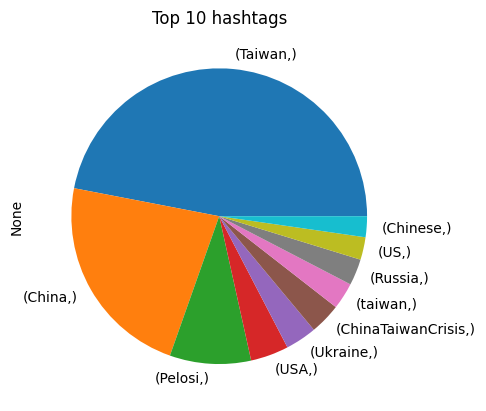

In [34]:
flattened_hashtags_df.value_counts().head(10).plot(kind="pie", title='Top 10 hashtags');

#### User mentions

In [35]:
tweets_df["user_mentions"]

0        [{'screen_name': 'i_ameztoy', 'name': 'Iban Am...
1        [{'screen_name': 'IndoPac_Info', 'name': 'Indo...
2        [{'screen_name': 'ZelenskyyUa', 'name': 'Волод...
3                                                       []
4        [{'screen_name': 'ChinaUncensored', 'name': 'C...
                               ...                        
21974    [{'screen_name': 'metesohtaoglu', 'name': 'Met...
21987    [{'screen_name': 'NEVERBOW', 'name': 'P K', 'i...
21989    [{'screen_name': 'BBCNews', 'name': 'BBC News ...
21991                                                   []
21997    [{'screen_name': 'Reuters', 'name': 'Reuters',...
Name: user_mentions, Length: 7440, dtype: object

In [36]:
# take the rows from that have values in the user_mentions columns
user_mentions_list_df = tweets_df.loc[tweets_df["user_mentions"] != " "]
user_mentions_list_df = user_mentions_list_df['user_mentions']
user_mentions_list_df

0        [{'screen_name': 'i_ameztoy', 'name': 'Iban Am...
1        [{'screen_name': 'IndoPac_Info', 'name': 'Indo...
2        [{'screen_name': 'ZelenskyyUa', 'name': 'Волод...
3                                                       []
4        [{'screen_name': 'ChinaUncensored', 'name': 'C...
                               ...                        
21974    [{'screen_name': 'metesohtaoglu', 'name': 'Met...
21987    [{'screen_name': 'NEVERBOW', 'name': 'P K', 'i...
21989    [{'screen_name': 'BBCNews', 'name': 'BBC News ...
21991                                                   []
21997    [{'screen_name': 'Reuters', 'name': 'Reuters',...
Name: user_mentions, Length: 7440, dtype: object

#### flatten user mentions

In [37]:
#create dataframe where each user_mention gets its own row
flattened_user_mentions = []
for user_mentions_list in user_mentions_list_df:
    for user_list in user_mentions_list:
        # print(list(user_list.values())[0])
        flattened_user_mentions.append(list(user_list.values())[0])
flattened_user_mentions_df = pd.DataFrame(flattened_user_mentions, columns=['user_mentions'])
flattened_user_mentions_df

,user_mentions
0,i_ameztoy
1,IndoPac_Info
2,ZelenskyyUa
3,ChinaUncensored
4,benedictrogers
...,...
6516,metesohtaoglu
6517,NEVERBOW
6518,BBCNews
6519,SpeakerPelosi


In [38]:
flattened_user_mentions_df.value_counts()

user_mentions  
SpeakerPelosi      205
iingwen            164
CGMeifangZhang     119
SpokespersonCHN     86
IndoPac_Info        85
                  ... 
Nausicaa4_           1
NavalWarCollege      1
NavitaSrikant        1
Neloangelo314        1
SenSchumer           1
Length: 3003, dtype: int64

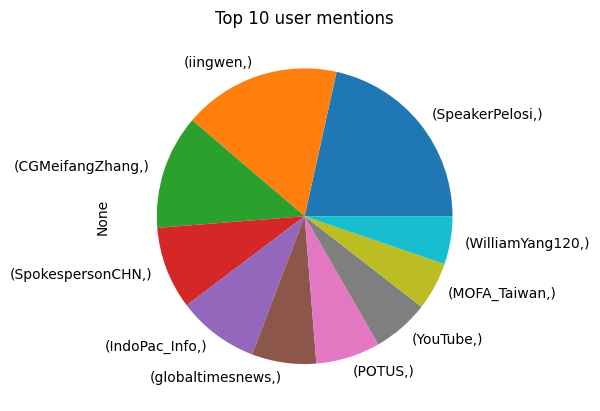

In [39]:
flattened_user_mentions_df.value_counts().head(10).plot(kind="pie", title='Top 10 user mentions');